# Survey Stack Overflow

## Download do arquivo

In [ ]:
import requests
import zipfile
import os
anos = [2019, 2020, 2021, 2022, 2023, 2024]
#anos = [2019, 2020]
# URL do arquivo
for ano in anos:
  url = f"https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-{ano}.zip"
  filename = f"stack-overflow-developer-survey-{ano}.zip"

  # Baixar o arquivo
  print(f"Baixando o arquivo ano {ano}...")
  response = requests.get(url)
  with open(filename, "wb") as file:
      file.write(response.content)
  print(f"Arquivo {filename} baixado com sucesso!")

  # Descompactar o arquivo
  print("Descompactando o arquivo...")
  with zipfile.ZipFile(filename, "r") as zip_ref:
      zip_ref.extractall(f"survey_{ano}")
  print(f"Arquivo descompactado na pasta 'survey_{ano}'.")

  # Remover o arquivo zip após descompactar
  os.remove(filename)
  print(f"Arquivo {filename} removido!")

Baixando o arquivo ano 2019...
Arquivo stack-overflow-developer-survey-2019.zip baixado com sucesso!
Descompactando o arquivo...
Arquivo descompactado na pasta 'survey_2019'.
Arquivo stack-overflow-developer-survey-2019.zip removido!
Baixando o arquivo ano 2020...
Arquivo stack-overflow-developer-survey-2020.zip baixado com sucesso!
Descompactando o arquivo...
Arquivo descompactado na pasta 'survey_2020'.
Arquivo stack-overflow-developer-survey-2020.zip removido!
Baixando o arquivo ano 2021...
Arquivo stack-overflow-developer-survey-2021.zip baixado com sucesso!
Descompactando o arquivo...
Arquivo descompactado na pasta 'survey_2021'.
Arquivo stack-overflow-developer-survey-2021.zip removido!
Baixando o arquivo ano 2022...
Arquivo stack-overflow-developer-survey-2022.zip baixado com sucesso!
Descompactando o arquivo...
Arquivo descompactado na pasta 'survey_2022'.
Arquivo stack-overflow-developer-survey-2022.zip removido!
Baixando o arquivo ano 2023...
Arquivo stack-overflow-developer-

## Construção do Dataframe e exploração

In [ ]:
import pandas as pd

dfs = []

for ano in anos:
    csv_file = f"survey_{ano}/survey_results_public.csv"
    df = pd.read_csv(csv_file, low_memory=False)

    if ano in [2019, 2020]:
        df = df.rename(columns={
            'LanguageWorkedWith': 'LanguageHaveWorkedWith',
            'LanguageDesireNextYear': 'LanguageWantToWorkWith'
        })

    df['ano'] = ano  # adiciona uma coluna de controle do ano
    dfs.append(df)

# Concatena tudo em um único DataFrame
df_completo = pd.concat(dfs, ignore_index=True)

In [ ]:
print("Dimensão do DataFrame (linhas, colunas):", df_completo.shape)

Dimensão do DataFrame (linhas, colunas): (464672, 224)


In [ ]:
columns = df_completo.columns

print("Columns in the DataFrame:")
for i, col in enumerate(columns):
    print(f"{i+1}. {col}")

Columns in the DataFrame:
1. Respondent
2. MainBranch
3. Hobbyist
4. OpenSourcer
5. OpenSource
6. Employment
7. Country
8. Student
9. EdLevel
10. UndergradMajor
11. EduOther
12. OrgSize
13. DevType
14. YearsCode
15. Age1stCode
16. YearsCodePro
17. CareerSat
18. JobSat
19. MgrIdiot
20. MgrMoney
21. MgrWant
22. JobSeek
23. LastHireDate
24. LastInt
25. FizzBuzz
26. JobFactors
27. ResumeUpdate
28. CurrencySymbol
29. CurrencyDesc
30. CompTotal
31. CompFreq
32. ConvertedComp
33. WorkWeekHrs
34. WorkPlan
35. WorkChallenge
36. WorkRemote
37. WorkLoc
38. ImpSyn
39. CodeRev
40. CodeRevHrs
41. UnitTests
42. PurchaseHow
43. PurchaseWhat
44. LanguageHaveWorkedWith
45. LanguageWantToWorkWith
46. DatabaseWorkedWith
47. DatabaseDesireNextYear
48. PlatformWorkedWith
49. PlatformDesireNextYear
50. WebFrameWorkedWith
51. WebFrameDesireNextYear
52. MiscTechWorkedWith
53. MiscTechDesireNextYear
54. DevEnviron
55. OpSys
56. Containers
57. BlockchainOrg
58. BlockchainIs
59. BetterLife
60. ITperson
61. OffOn


In [ ]:
# Em 2019 e 2020, a pesquisa possuia as colunas 'LanguageWorkedWith' e 'LanguageDesireNextYear'
# Em 2021 em diante, a pesquisa adotou os nomes 'LanguageHaveWorkedWith' e 'LanguageWantToWorkWith'

if ano in [2019, 2020]:
    df_completo = df_completo.rename(columns={
        'LanguageWorkedWith': 'LanguageHaveWorkedWith',
        'LanguageDesireNextYear': 'LanguageWantToWorkWith'
    })
elif ano >= 2021:
    # Já está com os nomes padronizados
    pass

In [ ]:
colunas_interesse = ['Age',
                     'LanguageHaveWorkedWith',
                     'LanguageWantToWorkWith',
                     'ano'
                     ]

In [ ]:
df_completo = df_completo[colunas_interesse]
print(df_completo.head())

    Age                       LanguageHaveWorkedWith  \
0  14.0              HTML/CSS;Java;JavaScript;Python   
1  19.0                          C++;HTML/CSS;Python   
2  28.0                                     HTML/CSS   
3  22.0                          C;C++;C#;Python;SQL   
4  30.0  C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA   

                            LanguageWantToWorkWith   ano  
0  C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL  2019  
1                      C++;HTML/CSS;JavaScript;SQL  2019  
2                                  Elixir;HTML/CSS  2019  
3                              C;C#;JavaScript;SQL  2019  
4         HTML/CSS;Java;JavaScript;SQL;WebAssembly  2019  


## Linguagens

In [ ]:
import pandas as pd

# Dicionário para contar as linguagens
LanguageHaveWorkedWith_count = {}

# Loop para contar as linguagens
for index, row in df_completo.iterrows():
    languages = row['LanguageHaveWorkedWith']
    if pd.notna(languages):
        language_list = [lang.strip() for lang in languages.replace(';', ',').split(',')]
        for lang in language_list:
            LanguageHaveWorkedWith_count[lang] = LanguageHaveWorkedWith_count.get(lang, 0) + 1

# Ordena do maior para o menor
sorted_languages = sorted(LanguageHaveWorkedWith_count.items(), key=lambda item: item[1], reverse=True)

# Mostrar as TOP 10
print("Contagem de linguagem que JÁ trabalhou (TOP 10):")
for i, (language, count) in enumerate(sorted_languages):
    if i >= 10:
        break
    print(f"{language}: {count}")


Contagem de linguagem que JÁ trabalhou (TOP 10):
JavaScript: 291274
HTML/CSS: 255260
SQL: 226224
Python: 209554
Java: 156793
TypeScript: 139953
C#: 128516
C++: 103773
PHP: 98219
C: 90649


In [ ]:
LanguageWantToWorkWith_count = {}

# Loop para contar as linguagens
for index, row in df_completo.iterrows():
    languages = row['LanguageWantToWorkWith']
    if pd.notna(languages):
        language_list = [lang.strip() for lang in languages.replace(';', ',').split(',')]
        for lang in language_list:
            LanguageWantToWorkWith_count[lang] = LanguageWantToWorkWith_count.get(lang, 0) + 1

# Ordena do maior para o menor
sorted_languages = sorted(LanguageWantToWorkWith_count.items(), key=lambda item: item[1], reverse=True)

print("Contagem de linguagem que QUER trabalhar (TOP 10):")
for i, (language, count) in enumerate(sorted_languages):
    if i >= 10:
        break
    print(f"{language}: {count}")


Contagem de linguagem que QUER trabalhar (TOP 10):
JavaScript: 198246
Python: 190729
HTML/CSS: 162841
SQL: 156969
TypeScript: 146320
C#: 101317
Rust: 97980
Go: 92783
Java: 92391
C++: 78861


### Lista final das linguagens

In [ ]:
lista_lang = top_10_languages_list
lista_lang

NameError: name 'top_10_languages_list' is not defined

## Idade

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir a ordem
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

# Criar o histograma
plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, x='Age', order=age_order, palette='viridis')
plt.title('Distribuição da Idade dos Desenvolvedores (Stack Overflow Survey anos 2018-2024)')
plt.xlabel('Idade')
plt.ylabel('Número de Desenvolvedores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Lista das 10 linguagens mais trabalhadas

In [ ]:
# Preparar dados para plotagem
language_evolution = {}

for language in lista_lang:
    language_evolution[language] = {}
    for ano in anos:
        df_ano = df_completo[df_completo['ano'] == ano]
        language_count_ano = 0
        for languages_worked in df_ano['LanguageHaveWorkedWith'].dropna():
            language_list = [lang.strip() for lang in languages_worked.replace(';', ',').split(',')]
            if language in language_list:
                language_count_ano += 1
        language_evolution[language][ano] = language_count_ano

In [ ]:
language_evolution

{'Kotlin': {2019: 5620,
  2020: 4468,
  2021: 6866,
  2022: 6507,
  2023: 7935,
  2024: 5665},
 'TypeScript': {2019: 18523,
  2020: 14578,
  2021: 24909,
  2022: 24752,
  2023: 34041,
  2024: 23150},
 'Java': {2019: 35917,
  2020: 23074,
  2021: 29162,
  2022: 23644,
  2023: 26757,
  2024: 18239},
 'HTML/CSS': {2019: 55466,
  2020: 36181,
  2021: 46259,
  2022: 39142,
  2023: 46396,
  2024: 31816},
 'Python': {2019: 36443,
  2020: 25287,
  2021: 39792,
  2022: 34155,
  2023: 43158,
  2024: 30719},
 'SQL': {2019: 47544,
  2020: 31413,
  2021: 38835,
  2022: 35127,
  2023: 42623,
  2024: 30682},
 'Rust': {2019: 2794,
  2020: 2929,
  2021: 5799,
  2022: 6625,
  2023: 11427,
  2024: 7559},
 'C++': {2019: 20524,
  2020: 13707,
  2021: 20057,
  2022: 16024,
  2023: 19634,
  2024: 13827},
 'C#': {2019: 27097,
  2020: 18041,
  2021: 22984,
  2022: 19883,
  2023: 24193,
  2024: 16318},
 'Go': {2019: 7201,
  2020: 5038,
  2021: 7879,
  2022: 7922,
  2023: 11592,
  2024: 8103},
 'JavaScript': {20

## Gráficos - Cada linguagem ao longo dos anos

In [ ]:
# Plotar a evolução de cada linguagem
for language in lista_lang:
    years_data = sorted(language_evolution[language].items())
    years = [year for year, count in years_data]
    counts = [count for year, count in years_data]

    plt.figure(figsize=(10, 6))
    plt.bar(years, counts, color=sns.color_palette('viridis', len(years)))
    plt.title(f'Evolução de {language} ao Longo dos Anos')
    plt.xlabel('Ano')
    plt.ylabel('Número de Desenvolvedores que Trabalham com a Linguagem')
    plt.xticks(years)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [ ]:
df_language_evolution = pd.DataFrame(language_evolution).T
df_language_evolution.reset_index(inplace=True)
df_language_evolution = df_language_evolution.rename(columns={'index': 'Language'})
df_language_evolution


In [ ]:
lista_lang_novo = ['Java', 'JavaScript', 'Python', 'TypeScript', 'Rust']
df_filtro = df_language_evolution[df_language_evolution['Language'].isin(lista_lang_novo)].sort_values(by='Language')
df_filtro

In [ ]:
df_filtro.to_csv('survey-2019-2024-linguagens.csv', index=False)

## Gráfico - Survey Stack Overflow - Evolução das Linguagens ao Longo dos Anos

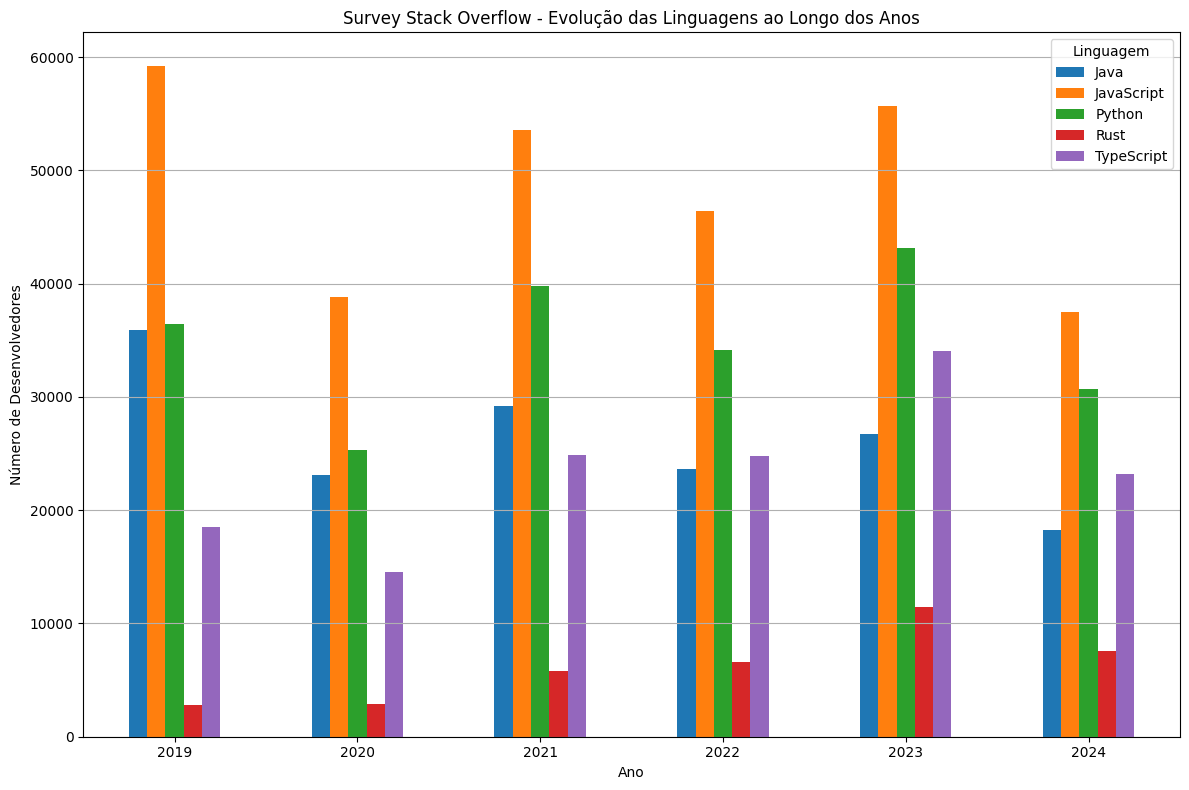

In [ ]:
# Plotar a pivot table como um gráfico de barras
pivot_table.T.plot(kind='bar', figsize=(12, 8))
plt.title('Survey Stack Overflow - Evolução das Linguagens ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Desenvolvedores')
plt.xticks(rotation=0)
plt.legend(title='Linguagem')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("anual_survey.png", dpi=1200)
plt.show()


## Tabela Percentagem - Survey

In [ ]:
# Percentagem
pivot_table_percentage = pivot_table.apply(lambda x: x / x.sum() * 100, axis=0)
pivot_table_percentage


Pivot Table with percentage by year:


Ano,2019,2020,2021,2022,2023,2024
Linguagem,,,,,,
Java,23.491131,22.040309,19.029162,17.434135,15.638772,15.567733
JavaScript,38.731556,37.082816,34.967275,34.245202,32.561633,32.000956
Python,23.835156,24.154169,25.965585,25.184524,25.224730,26.219923
Rust,1.827386,2.797784,3.784038,4.885009,6.678785,6.451916
TypeScript,12.114771,13.924921,16.253940,18.251130,19.896081,19.759472


In [ ]:
print("Tabela formatada para cópia:")
print(pivot_table_percentage.round(2).to_markdown())


Tabela formatada para cópia:
| Linguagem   |   2019 |   2020 |   2021 |   2022 |   2023 |   2024 |
|:------------|-------:|-------:|-------:|-------:|-------:|-------:|
| Java        |  23.49 |  22.04 |  19.03 |  17.43 |  15.64 |  15.57 |
| JavaScript  |  38.73 |  37.08 |  34.97 |  34.25 |  32.56 |  32    |
| Python      |  23.84 |  24.15 |  25.97 |  25.18 |  25.22 |  26.22 |
| Rust        |   1.83 |   2.8  |   3.78 |   4.89 |   6.68 |   6.45 |
| TypeScript  |  12.11 |  13.92 |  16.25 |  18.25 |  19.9  |  19.76 |


# REMOTEOK

## Import do dataset do Scrap do Site RemoteOK

In [ ]:
import pandas as pd
# Após Scrap/Crawling, o dataset foi salvo e compartilhado no Google Drive
drive_url = "https://drive.google.com/uc?export=download&id=1X6LyG_wfsRNm4jShHKUu3BQ5Z_PxcJ_a"
df_remoteok = pd.read_csv(drive_url)

print(df_remoteok.head())

         lang                   datetime
0  TypeScript  2025-06-17T14:32:25+00:00
1  TypeScript  2025-06-09T10:00:12+00:00
2  TypeScript  2025-06-09T10:00:03+00:00
3  TypeScript  2025-05-31T00:00:08+00:00
4  TypeScript  2025-05-29T22:36:46+00:00


In [ ]:
mapeamento_linguagens = {
    'TypeScript': 'TypeScript',
    'C_Sharp': 'C#',
    'Rust': 'Rust',
    'HTML': 'HTML/CSS',
    'Python': 'Python',
    'JavaScript': 'JavaScript',
    'Java': 'Java',
    'C': 'C',
    'C_Plus_Plus': 'C++',
    'SQL': 'SQL'
}

df_remoteok['lang'] = df_remoteok['lang'].map(mapeamento_linguagens).fillna(df_remoteok['lang'])

print("\nDataFrame com valores na coluna 'lang' substituídos:")
print(df_remoteok.head())


DataFrame com valores na coluna 'lang' substituídos:
         lang                   datetime
0  TypeScript  2025-06-17T14:32:25+00:00
1  TypeScript  2025-06-09T10:00:12+00:00
2  TypeScript  2025-06-09T10:00:03+00:00
3  TypeScript  2025-05-31T00:00:08+00:00
4  TypeScript  2025-05-29T22:36:46+00:00


In [ ]:
# Converter para datetime e extrair apenas a data (sem hora e fuso)
df_remoteok['date'] = pd.to_datetime(df_remoteok['datetime']).dt.date

# Elimintar datetime
df_remoteok.drop(columns=['datetime'], inplace=True)

# Criar uma coluna de ano
df_remoteok['ano'] = pd.to_datetime(df_remoteok['date']).dt.year

In [ ]:
# Filtrar df_remoteok com as linguagens de lista_lang_novo
df_remoteok_filtered = df_remoteok[df_remoteok['lang'].isin(lista_lang_novo)]

df_remoteok_filtered = df_remoteok_filtered[(df_remoteok_filtered['ano'] >= 2019) & (df_remoteok_filtered['ano'] <= 2024)]

In [ ]:
pivot_table_remoteok = df_remoteok_filtered.pivot_table(
    index='lang',
    columns='ano',
    aggfunc='count',
    fill_value=0
)

pivot_table_remoteok.columns.name = None
pivot_table_remoteok = pivot_table_remoteok.reset_index()
pivot_table_remoteok = pivot_table_remoteok.rename(columns={'lang': 'Language'})


In [ ]:
pivot_table_remoteok

Language date                         
ano             2019 2020 2021 2022 2023 2024
0          Java  160  358  268   72   37  107
1    JavaScript   57  104  283  104   45  149
2        Python    0   23  264  280   62  326
3          Rust    0    0    0   24    8    4
4    TypeScript    0    0   22  106   88   97

In [ ]:
pivot_table_remoteok.to_csv('remoteok_2019-2024-linguagens.csv')

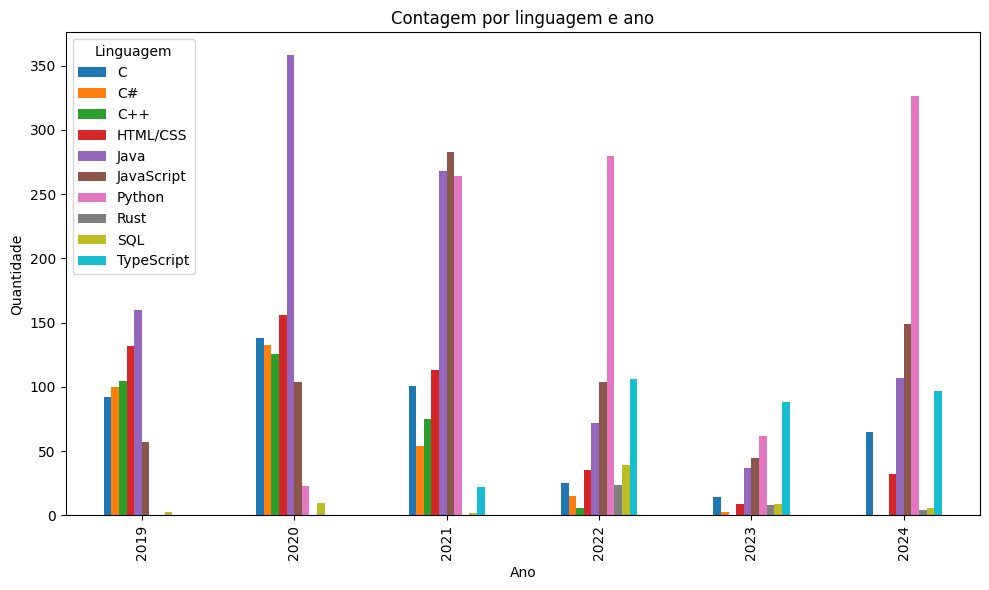

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


tabela_filtrada = tabela_anual[(tabela_anual['ano'] > 2018) & (tabela_anual['ano'] <= 2024)]


# Aplicar o mapeamento
#tabela_filtrada['lang'] = tabela_filtrada['lang'].map(mapa_langs)

tabela_filtrada = tabela_anual[(tabela_anual['ano'] > 2018) & (tabela_anual['ano'] <= 2024)].copy()


# Pivot para facilitar o gráfico
tabela_pivot = tabela_filtrada.pivot(index='lang', columns='ano', values='contagem').fillna(0)

# Plot
tabela_pivot.T.plot(kind='bar', figsize=(10, 6))

plt.title("Contagem por linguagem e ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend(title='Linguagem')
plt.tight_layout()

# Salvar imagem
plt.savefig("tabela_anual.png", dpi=300)

# Mostrar (opcional)
plt.show()


ano          2019   2020   2021   2022  2023   2024
lang                                               
Java        160.0  358.0  268.0   72.0  37.0  107.0
JavaScript   57.0  104.0  283.0  104.0  45.0  149.0
Python        0.0   23.0  264.0  280.0  62.0  326.0
Rust          0.0    0.0    0.0   24.0   8.0    4.0
TypeScript    0.0    0.0   22.0  106.0  88.0   97.0


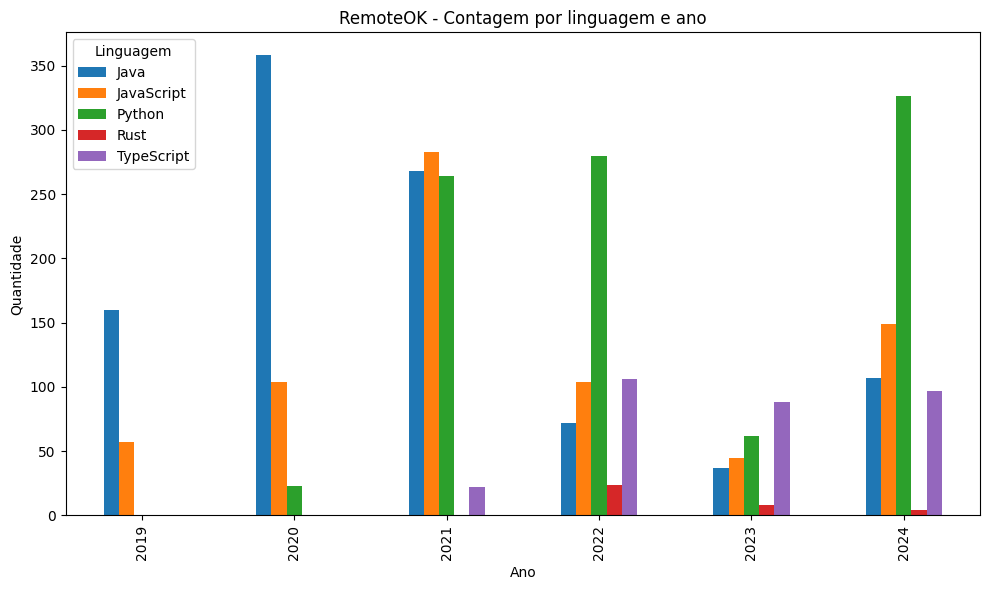

In [ ]:
# Algumas linguagens não fazem sentido serem pensadas, então decidimos diminui de 10 para 5 linguagens
# do desenvolvimento de Software Moderno
lista_lang_novo = ['Java', 'JavaScript', 'Python', 'TypeScript', 'Rust']

tabela_filtrada_novo = tabela_anual[(tabela_anual['ano'] > 2018) & (tabela_anual['ano'] <= 2024) & (tabela_anual['lang'].isin(lista_lang_novo))].copy()

# Pivot para facilitar o gráfico
tabela_pivot_novo = tabela_filtrada_novo.pivot(index='lang', columns='ano', values='contagem').fillna(0)

print(tabela_pivot_novo)

# Plot
tabela_pivot_novo.T.plot(kind='bar', figsize=(10, 6))

plt.title("RemoteOK - Contagem por linguagem e ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend(title='Linguagem')
plt.tight_layout()

# Salvar imagem
plt.savefig("tabela_anual_remoteok.png", dpi=1200)

# Mostrar (opcional)
plt.show()


In [ ]:
tabela_pivot_percentual = tabela_pivot_novo.apply(lambda x: x / x.sum(), axis=0)

print("\nTabela Pivot com valores percentuais por ano:")
tabela_pivot_percentual


Tabela Pivot com valores percentuais por ano:


ano,2019,2020,2021,2022,2023,2024
lang,,,,,,
Java,0.737327,0.738144,0.320191,0.122867,0.154167,0.156662
JavaScript,0.262673,0.214433,0.338112,0.177474,0.187500,0.218155
Python,0.000000,0.047423,0.315412,0.477816,0.258333,0.477306
Rust,0.000000,0.000000,0.000000,0.040956,0.033333,0.005857
TypeScript,0.000000,0.000000,0.026284,0.180887,0.366667,0.142020


## Gráficos RemoteOK

In [ ]:
print(df_remoteok.head())

         lang                   datetime        date   ano
0  TypeScript  2025-06-17T14:32:25+00:00  2025-06-17  2025
1  TypeScript  2025-06-09T10:00:12+00:00  2025-06-09  2025
2  TypeScript  2025-06-09T10:00:03+00:00  2025-06-09  2025
3  TypeScript  2025-05-31T00:00:08+00:00  2025-05-31  2025
4  TypeScript  2025-05-29T22:36:46+00:00  2025-05-29  2025


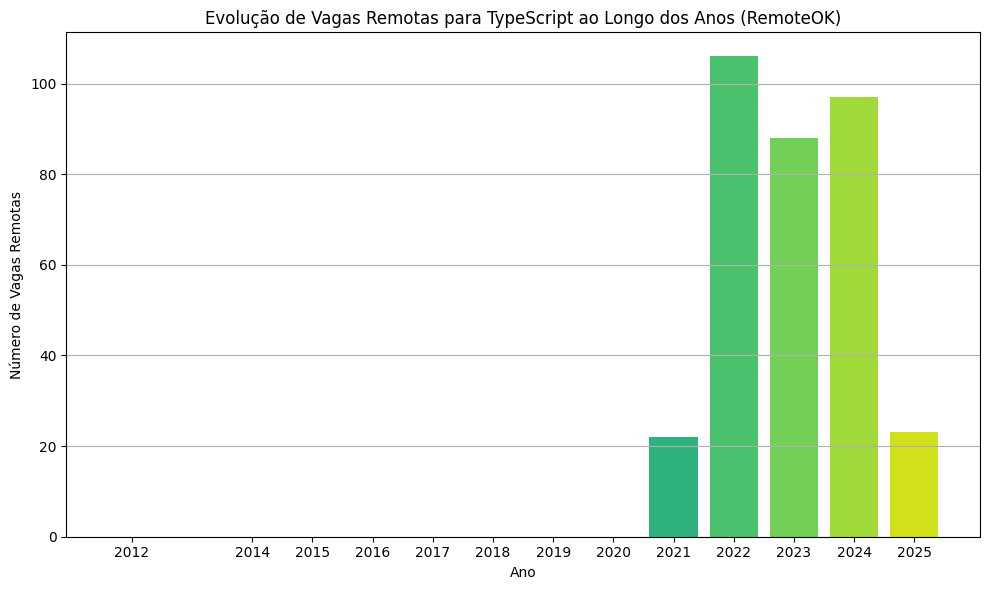

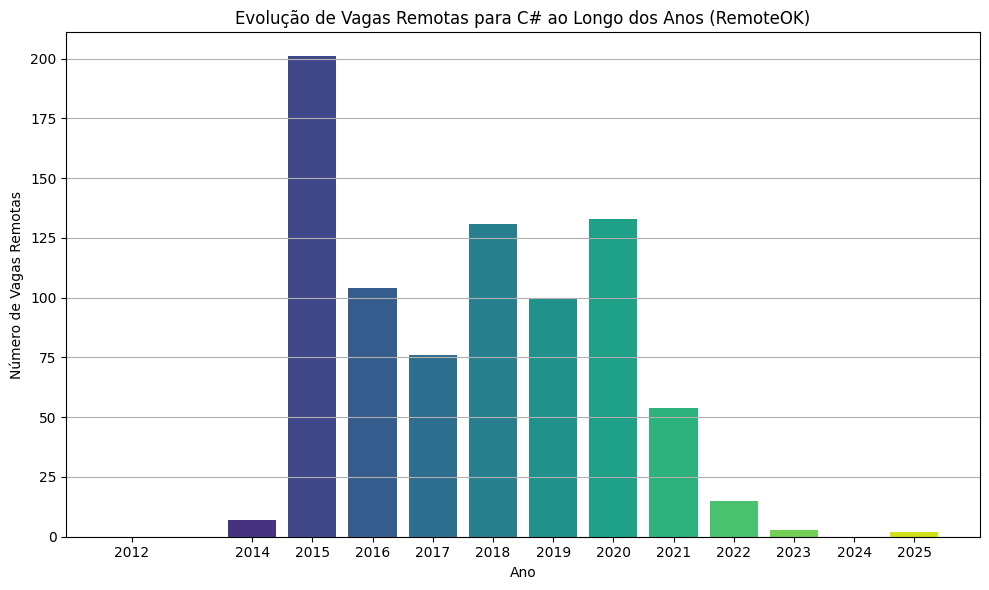

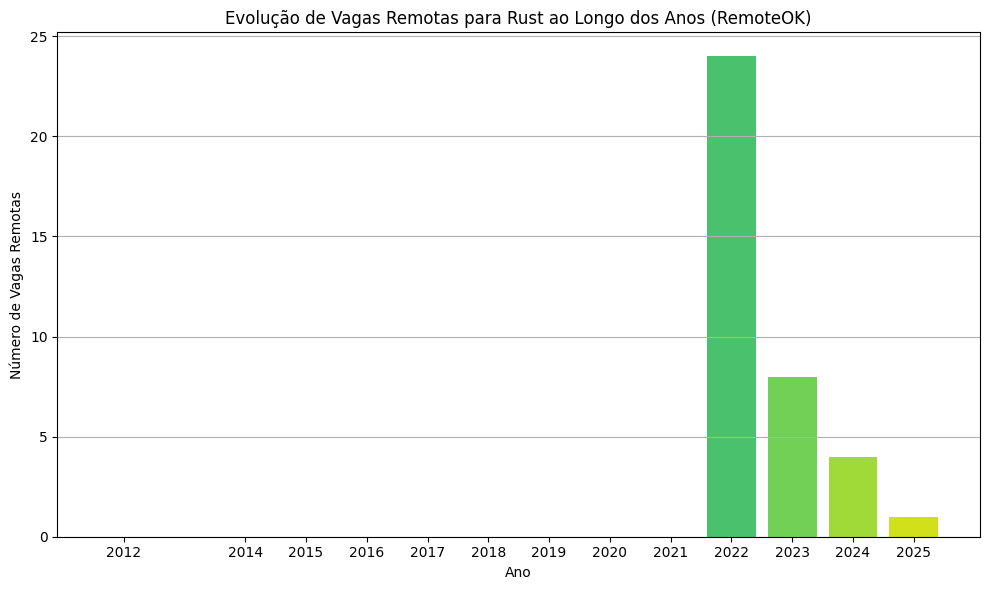

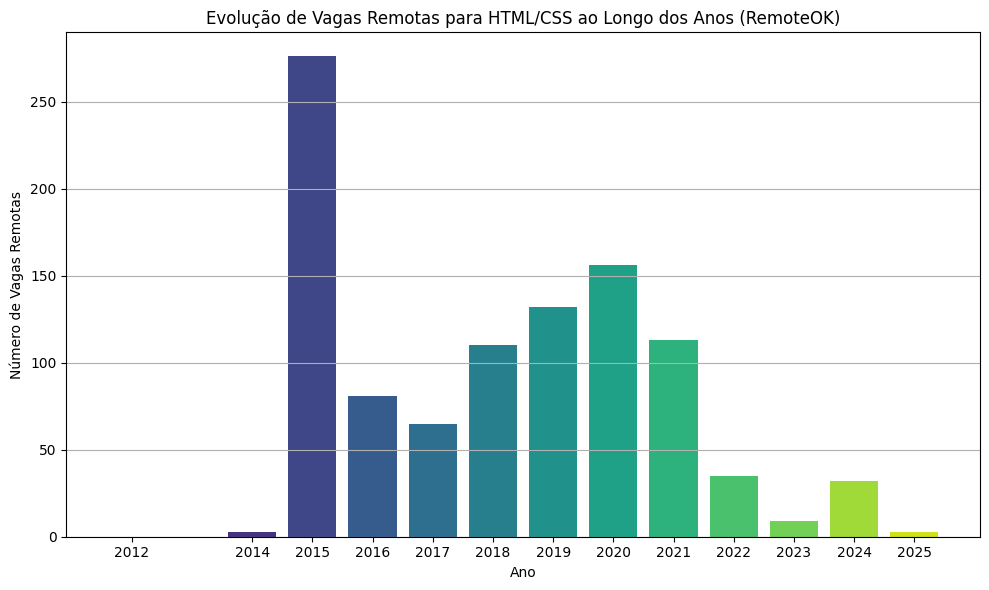

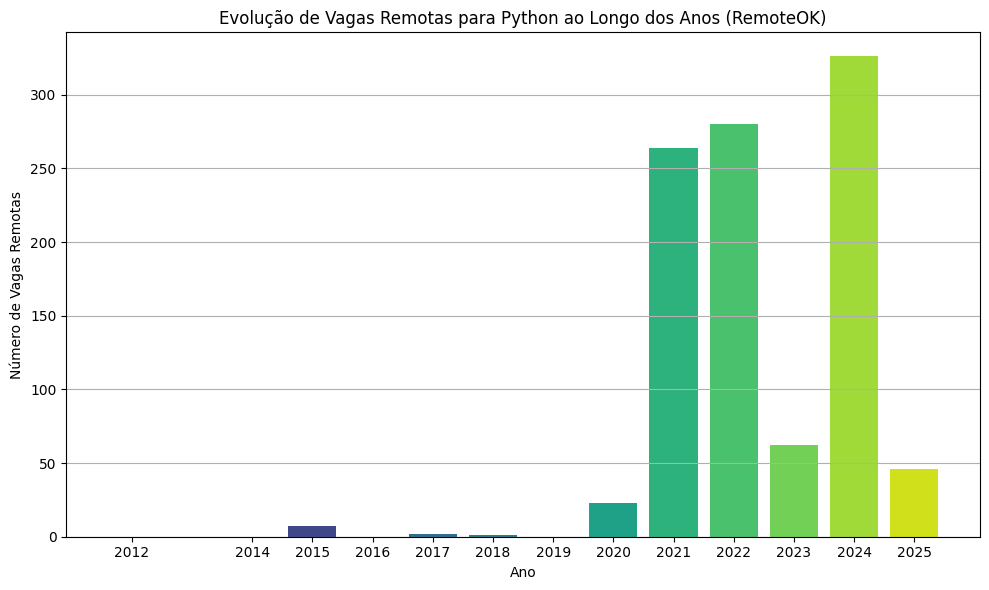

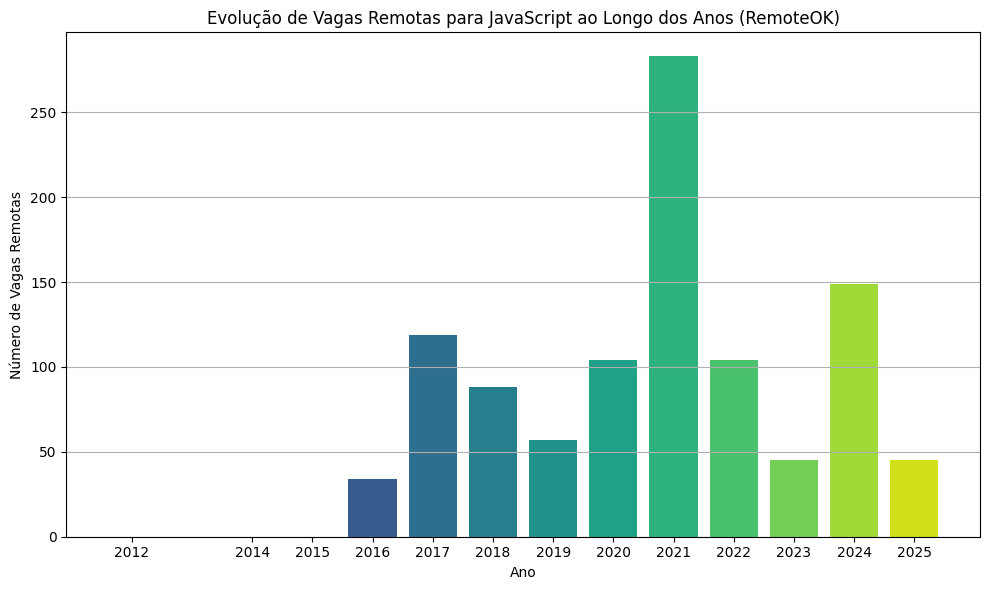

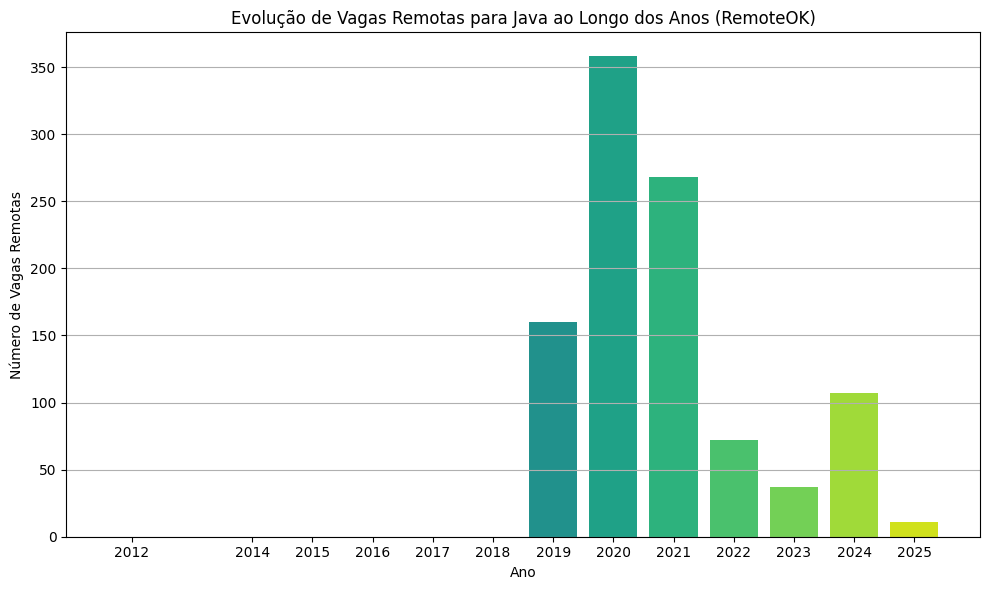

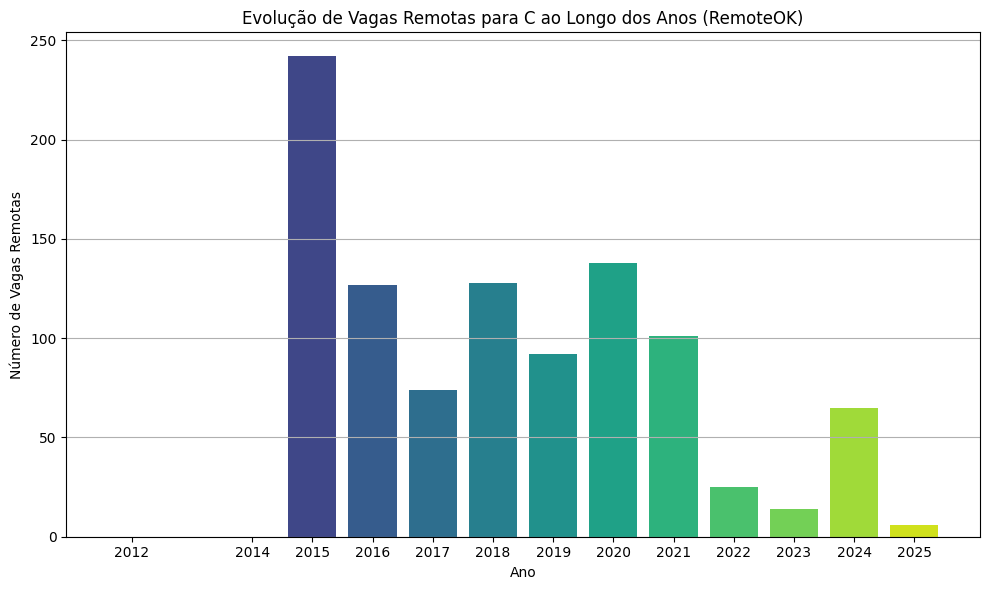

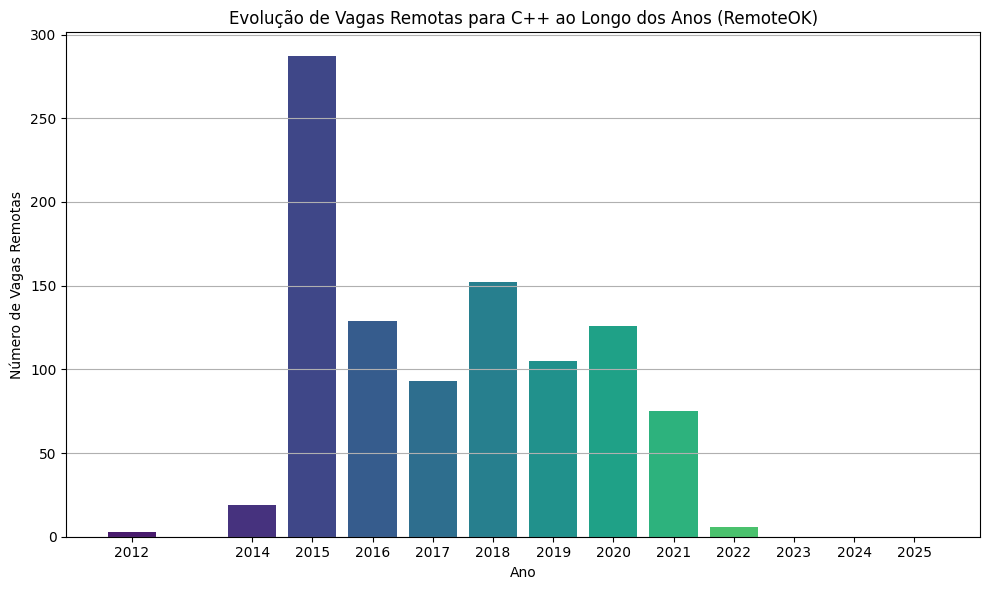

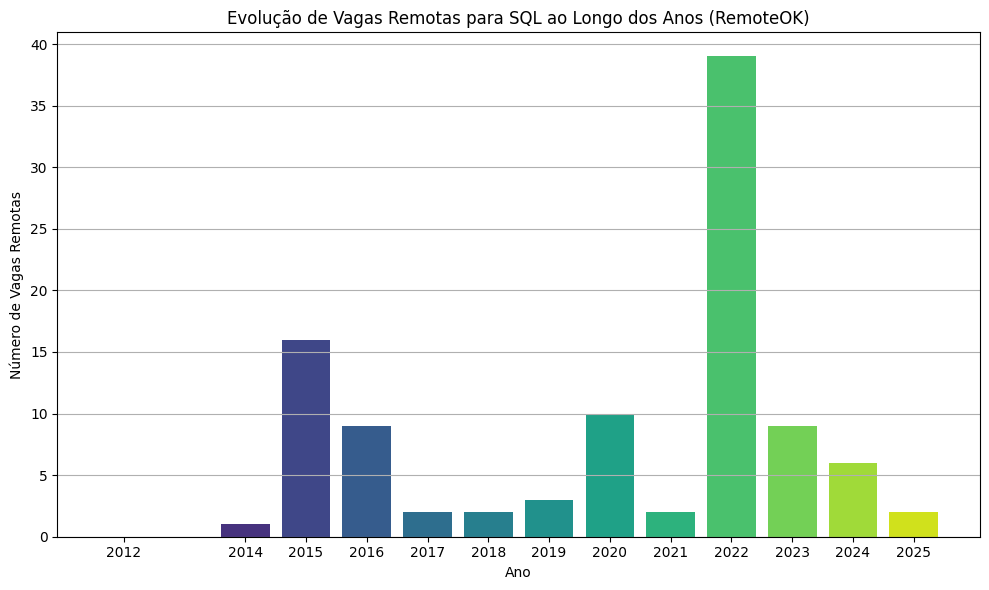

In [ ]:
# prompt: fazer um loop and lista_lang e plotar a evolução em gráficos de barras para cada ano de df_remoteok
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lista_lang = df_remoteok['lang'].unique()
# Função para limpar e extrair linguagens
def clean_and_extract_languages(lang_string):
    if pd.isna(lang_string):
        return []
    # Substituir ';' por ',' e então dividir por ','
    return [lang.strip() for lang in lang_string.replace(';', ',').split(',') if lang.strip()]

# Aplicar a função para obter listas de linguagens
df_remoteok['cleaned_lang_list'] = df_remoteok['lang'].apply(clean_and_extract_languages)

# Anos de interesse (mesmos anos do Stack Overflow Survey)
anos_remoteok = sorted(df_remoteok['ano'].unique())

# Filtrar os anos para corresponder aos anos do Stack Overflow
anos_para_grafico = anos_remoteok

# Loop pelas linguagens definidas em lista_lang
for language in lista_lang:
    language_evolution_remoteok = {}
    for ano in anos_para_grafico:
        # Filtrar DataFrame para o ano atual
        df_ano = df_remoteok[df_remoteok['ano'] == ano]

        # Contar ocorrências da linguagem no ano atual
        language_count_ano = 0
        for lang_list in df_ano['cleaned_lang_list']:
            if language in lang_list:
                language_count_ano += 1
        language_evolution_remoteok[ano] = language_count_ano

    # Preparar dados para plotagem
    years_data = sorted(language_evolution_remoteok.items())
    years = [year for year, count in years_data]
    counts = [count for year, count in years_data]

    # Plotar o gráfico de barras para a linguagem atual
    plt.figure(figsize=(10, 6))
    plt.bar(years, counts, color=sns.color_palette('viridis', len(years)))
    plt.title(f'Evolução de Vagas Remotas para {language} ao Longo dos Anos (RemoteOK)')
    plt.xlabel('Ano')
    plt.ylabel('Número de Vagas Remotas')
    plt.xticks(years)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Remover a coluna auxiliar
df_remoteok = df_remoteok.drop(columns=['cleaned_lang_list'])

## Tabela Percentagem - REMOTEOK


Tabela RemoteOK Pivot para linguagens selecionadas:
ano          2019   2020   2021   2022  2023   2024
lang                                               
Java        160.0  358.0  268.0   72.0  37.0  107.0
JavaScript   57.0  104.0  283.0  104.0  45.0  149.0
Python        0.0   23.0  264.0  280.0  62.0  326.0
Rust          0.0    0.0    0.0   24.0   8.0    4.0
TypeScript    0.0    0.0   22.0  106.0  88.0   97.0

Tabela RemoteOK Pivot com valores percentuais por ano:


ano,2019,2020,2021,2022,2023,2024
lang,,,,,,
Java,0.737327,0.738144,0.320191,0.122867,0.154167,0.156662
JavaScript,0.262673,0.214433,0.338112,0.177474,0.187500,0.218155
Python,0.000000,0.047423,0.315412,0.477816,0.258333,0.477306
Rust,0.000000,0.000000,0.000000,0.040956,0.033333,0.005857
TypeScript,0.000000,0.000000,0.026284,0.180887,0.366667,0.142020


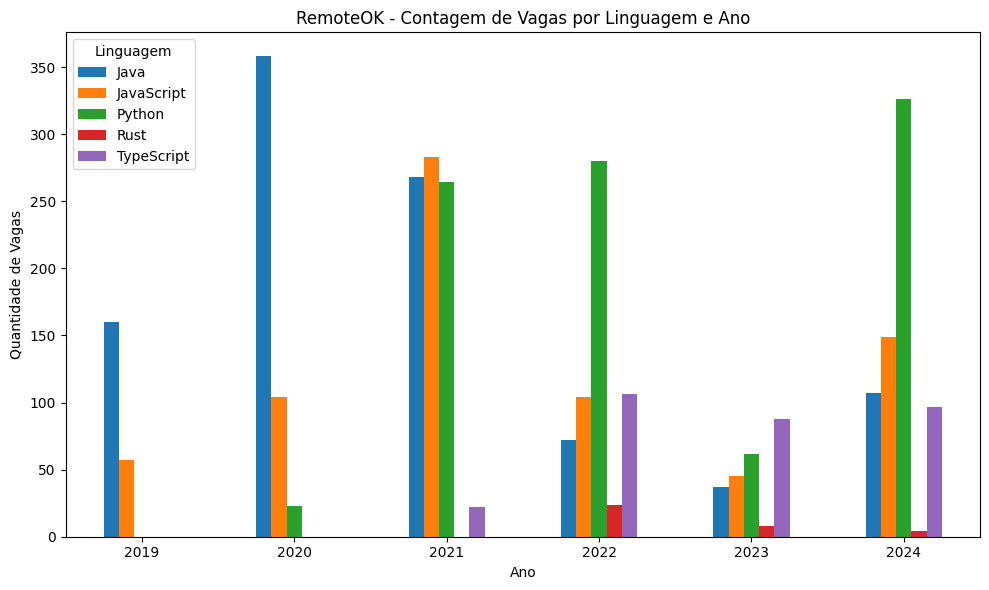

In [ ]:
# Vamos jogar numa tabela para outra visualização
tabela_remoteok_pivot_filtered = tabela_anual[
    (tabela_anual['ano'] > 2018) &
    (tabela_anual['ano'] <= 2024) &
    (tabela_anual['lang'].isin(lista_lang_novo))
].copy()

tabela_remoteok_pivot = tabela_remoteok_pivot_filtered.pivot(
    index='lang',
    columns='ano',
    values='contagem'
).fillna(0)

print("\nTabela RemoteOK Pivot para linguagens selecionadas:")
print(tabela_remoteok_pivot)

# Plot the pivot table
tabela_remoteok_pivot.T.plot(kind='bar', figsize=(10, 6))

plt.title("RemoteOK - Contagem de Vagas por Linguagem e Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Vagas")
plt.legend(title='Linguagem')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout()

plt.savefig("tabela_remoteok_pivot.png", dpi=300)

tabela_remoteok_pivot_percentual = tabela_remoteok_pivot.apply(lambda x: x / x.sum(), axis=0)

print("\nTabela RemoteOK Pivot com valores percentuais por ano:")
tabela_remoteok_pivot_percentual

# Comparação entre Vagas e Skills

{2019: 35917, 2020: 23074, 2021: 29162, 2022: 23644, 2023: 26757, 2024: 18239}


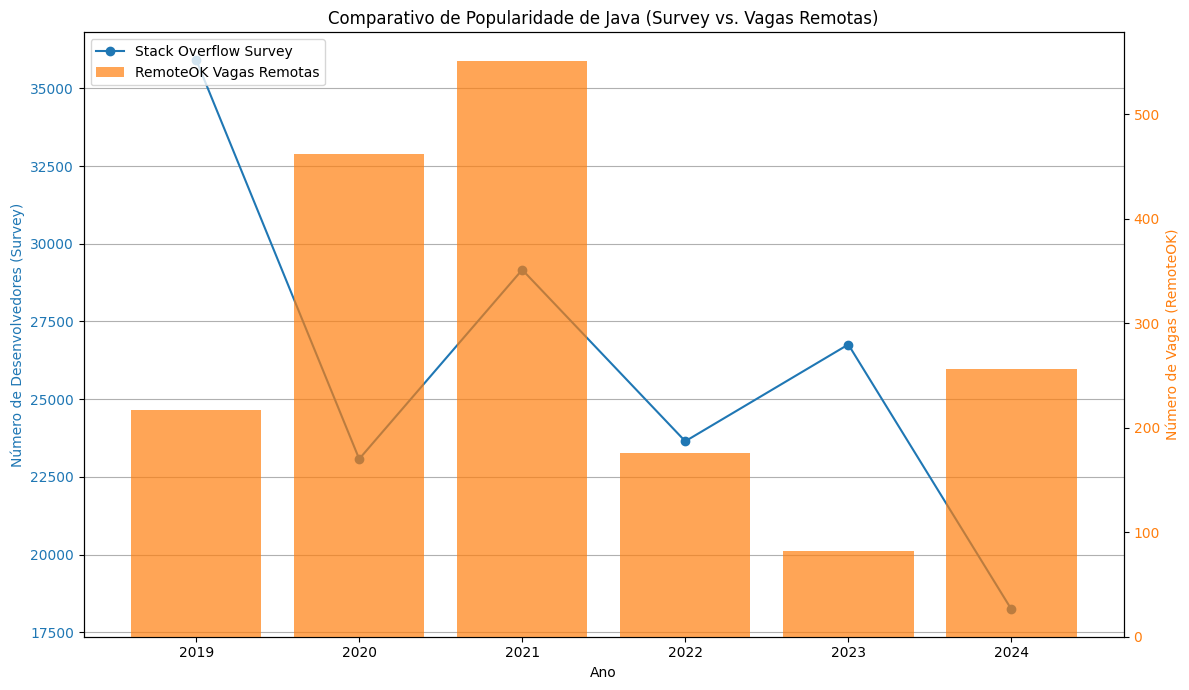

{2019: 59219, 2020: 38822, 2021: 53587, 2022: 46443, 2023: 55711, 2024: 37492}


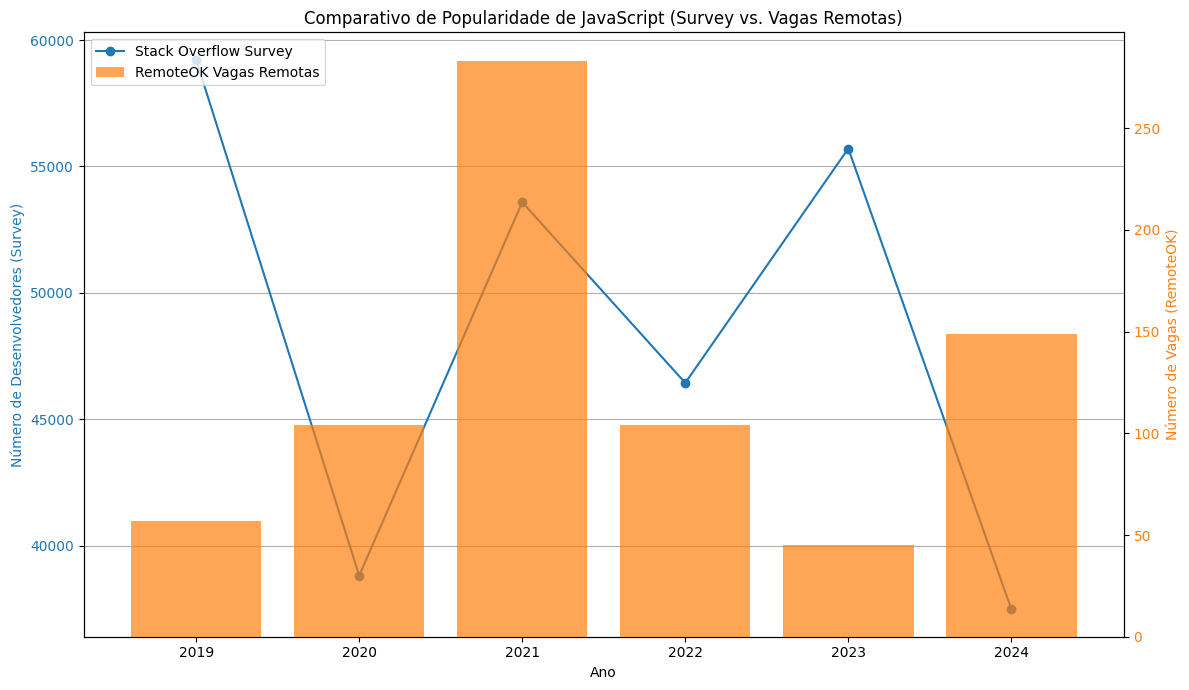

{2019: 36443, 2020: 25287, 2021: 39792, 2022: 34155, 2023: 43158, 2024: 30719}


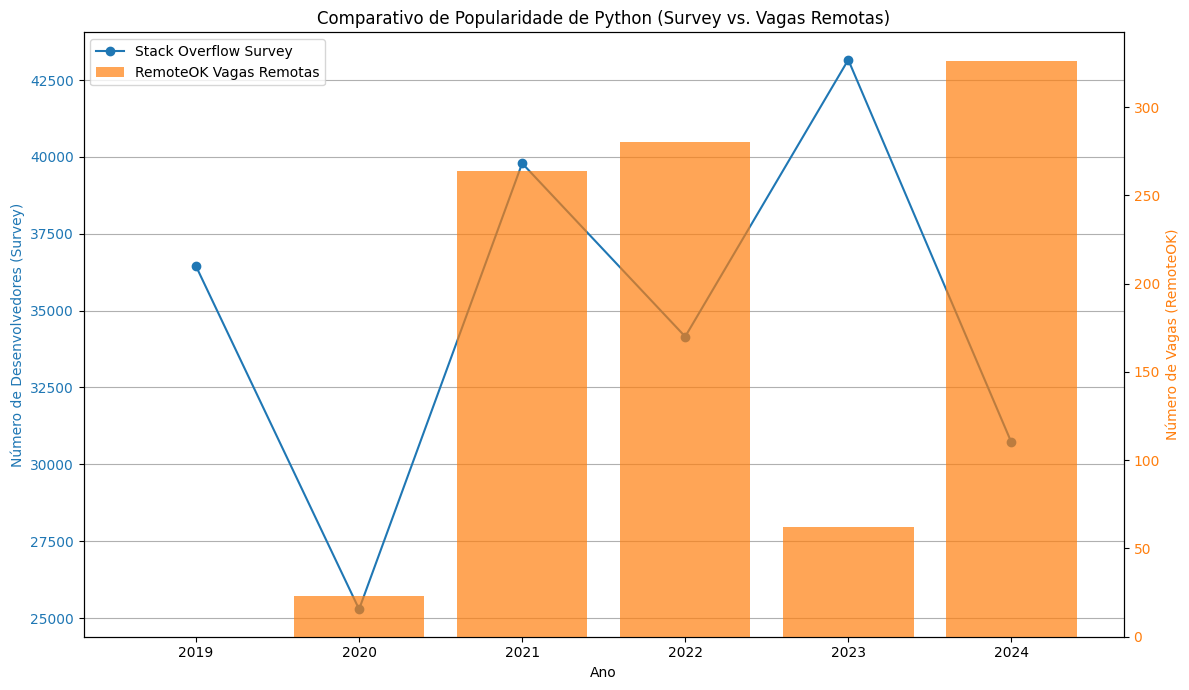

{2019: 18523, 2020: 14578, 2021: 24909, 2022: 24752, 2023: 34041, 2024: 23150}


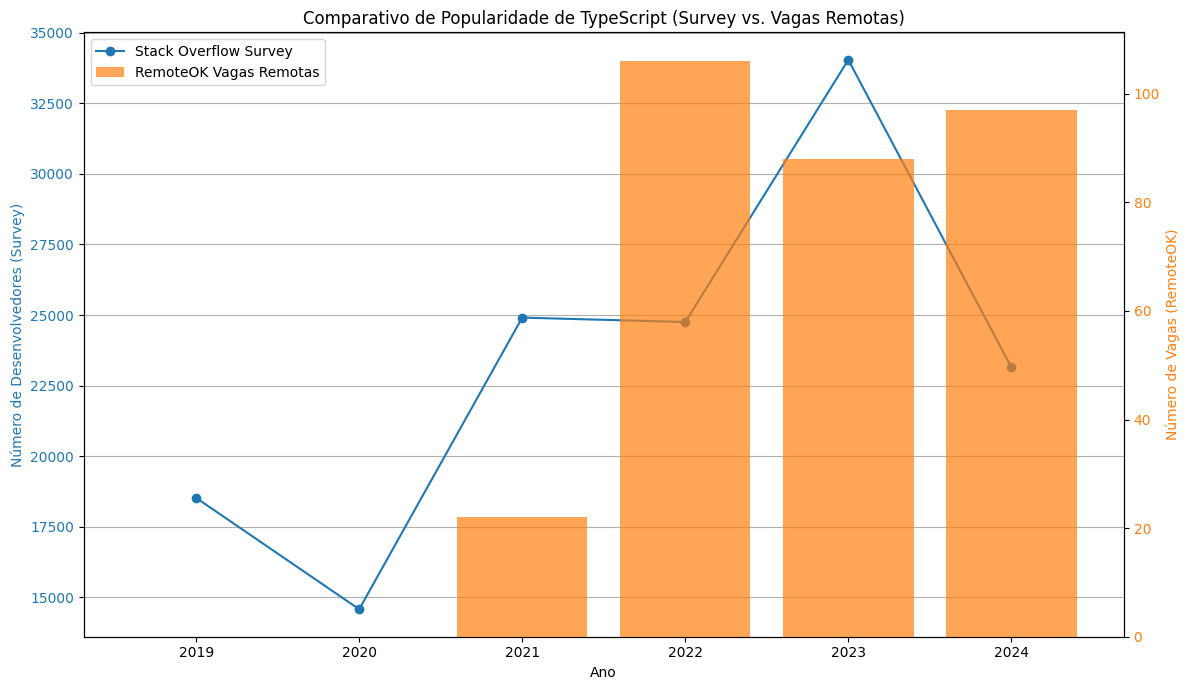

{2019: 2794, 2020: 2929, 2021: 5799, 2022: 6625, 2023: 11427, 2024: 7559}


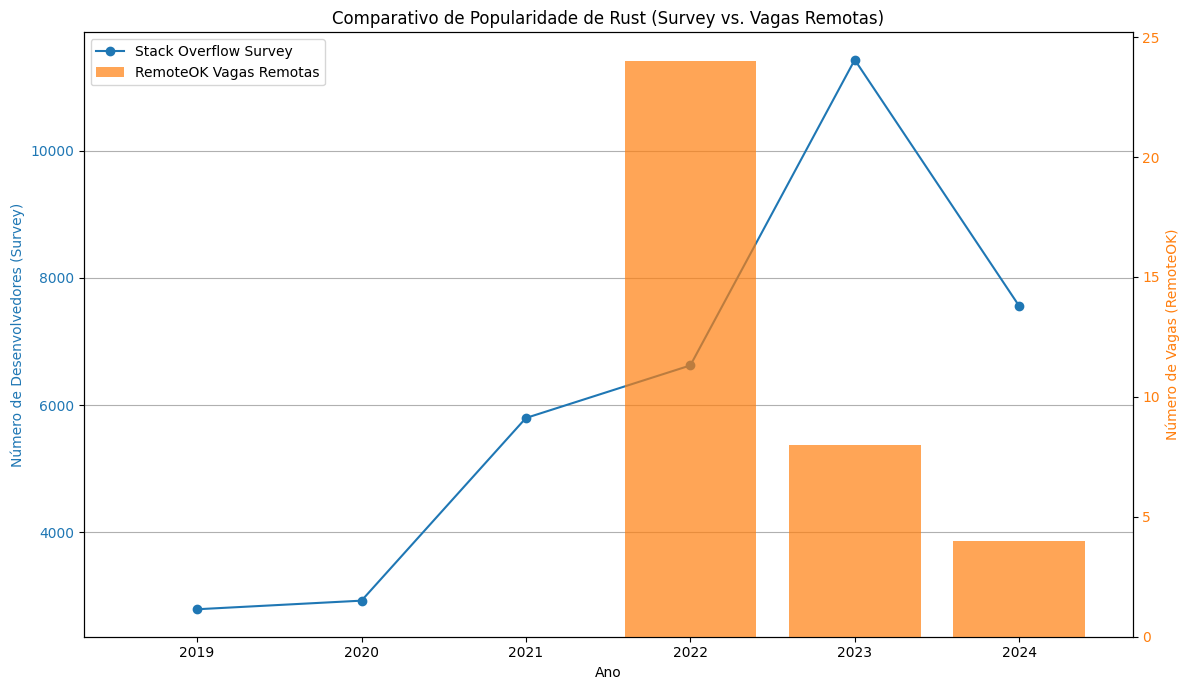

In [ ]:
# Embora as vagas de REMOTEOK estejam entre 2012 até 2025, a survey possui somente o período de 2019 a 2024
# Para a comparação vamos usar os anos completos 2019 a 2024
anos = [2019, 2020, 2021, 2022, 2023, 2024]
# Loop pelas linguagens
for language in lista_lang_novo:
    # Preparar dados do Stack Overflow Survey (df_completo)
    language_evolution_completo = {}
    for ano in anos:
        df_ano = df_completo[df_completo['ano'] == ano]
        language_count_ano_completo = 0
        for languages_worked in df_ano['LanguageHaveWorkedWith'].dropna():
            language_list = [lang.strip() for lang in languages_worked.replace(';', ',').split(',')]
            if language in language_list:
                language_count_ano_completo += 1
        language_evolution_completo[ano] = language_count_ano_completo

    years_data_completo = sorted(language_evolution_completo.items())
    years_completo = [year for year, count in years_data_completo]
    counts_completo = [count for year, count in years_data_completo]

    # Preparar dados do RemoteOK (df_remoteok)
    language_evolution_remoteok = {}
    # Filtrar os anos para corresponder aos anos do Stack Overflow para comparação
    #anos_para_grafico_remoteok = sorted(df_remoteok['ano'].unique())
    anos_para_grafico_remoteok = sorted(anos)


    for ano in anos_para_grafico_remoteok:
        # Filtrar DataFrame para o ano atual
        df_ano = df_remoteok[df_remoteok['ano'] == ano]

        # Contar ocorrências da linguagem no ano atual (usando a coluna 'lang' mapeada)
        language_count_ano_remoteok = 0
        # Certificar que a coluna 'lang' contém a linguagem desejada
        # Usamos .str.contains() pois um registro pode ter mais de uma linguagem
        # re.escape() é usado para lidar com caracteres especiais como C++ ou C#
        import re
        if language == 'C#':
             language_count_ano_remoteok = df_ano['lang'].dropna().str.contains(r'C#', regex=True).sum()
        elif language == 'C++':
             language_count_ano_remoteok = df_ano['lang'].dropna().str.contains(r'C\+\+', regex=True).sum()
        else:
            language_count_ano_remoteok = df_ano['lang'].dropna().str.contains(re.escape(language), regex=False).sum()


        language_evolution_remoteok[ano] = language_count_ano_remoteok

    print(language_evolution_completo)
    years_data_remoteok = sorted(language_evolution_remoteok.items())
    years_remoteok = [year for year, count in years_data_remoteok]
    counts_remoteok = [count for year, count in years_data_remoteok]

    # Plotar os dois gráficos em eixos Y diferentes
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Plotar Stack Overflow Survey como linha no eixo Y esquerdo
    ax1.plot(years_completo, counts_completo, marker='o', color='tab:blue', label='Stack Overflow Survey')
    ax1.set_xlabel('Ano')
    ax1.set_ylabel('Número de Desenvolvedores (Survey)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xticks(years_completo)
    ax1.grid(axis='y')

    # Criar o segundo eixo Y para RemoteOK
    ax2 = ax1.twinx()
    # Plotar RemoteOK como barras no eixo Y direito
    ax2.bar(years_remoteok, counts_remoteok, color='tab:orange', alpha=0.7, label='RemoteOK Vagas Remotas')
    ax2.set_ylabel('Número de Vagas (RemoteOK)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')


    plt.title(f'Comparativo de Popularidade de {language} (Survey vs. Vagas Remotas)')
    fig.tight_layout() # Ajusta para evitar sobreposição
    # Adicionar legendas combinadas
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax2.legend(lines + bars, labels + bar_labels, loc='upper left')

    plt.show()